# Overfitting and Underfitting
**Overfitting**: occurs when a model is too complex for the data, closely modeling the training data and being inaccurate when using new data. It happens when:
- There is not enough data to train on
- There is too much noise in the relationship between $x$ and $y$

**Underfitting**: occurs when a model is too simple for the data, not effectively approximating the generative process well. It happens when:
- There is plenty of data to train on
- There is low noise and the model is too constrained to capture the noise

There exists a tradeoff between overfitting and underfiting. Overfit models tend to exhibit high *variance* (changes in the training set result in changes in prediction errors without an obvious structure), whereas underfit models exhibit high *bias* (systematically make errors with changes in training data as they ignore some aspects of it).

## Sources of Overfitting and Underfitting

**(1) Data**: assume the complexity of the model is fixed. With an increase in the number of training samples, train error and test error converge. The more data available, the less the model can capture noise. Beyond a certain point, there are diminishing returns.

*See learning curve below*

**(2) Complexity**: assume the amount of data is fixed. With an increase in the model complexity, the train error and test error diverge. The more complex the model, the more likely it memorizes data.

*See validation curve below*

## Validation Curves

### Learning Curve
**Learning Curve**: shows the train and test score of an estimator for varying numbers of training samples. This helps to identify if the model benefits from adding more training data, and whether the estimator suffers from variance error or bias error.

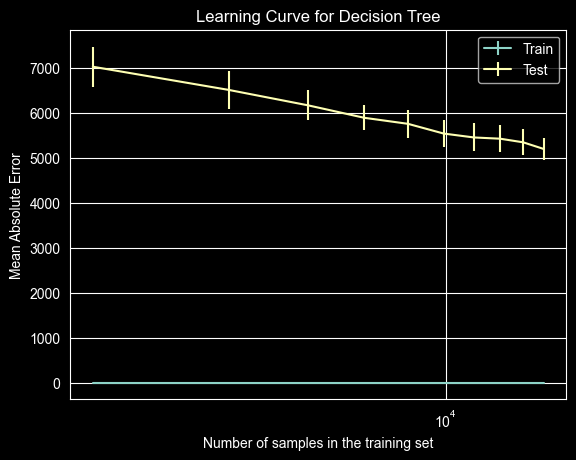

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
from sklearn.tree import DecisionTreeRegressor
import numpy as np

housing = fetch_california_housing(as_frame=True)
data, target = housing.data, housing.target * 100

train_sizes = np.linspace(0.1, 1.0, num=10, endpoint=True)

display = LearningCurveDisplay.from_estimator(
    DecisionTreeRegressor(),
    data,
    target,
    train_sizes=train_sizes,
    cv=ShuffleSplit(n_splits=30, test_size=0.2),
    score_type="both",
    scoring="neg_mean_squared_error",
    negate_score=True,
    score_name="Mean Absolute Error",
    std_display_style="errorbar",
    n_jobs=2
)

_ = display.ax_.set(
    xscale="log",
    title="Learning Curve for Decision Tree"
)

### Validation Curve
**Validation Curve**: shows the train and test score of an estimator for changes in a hyperparameter. This helps to identify if the model benefits from optimizing hyperparameters.

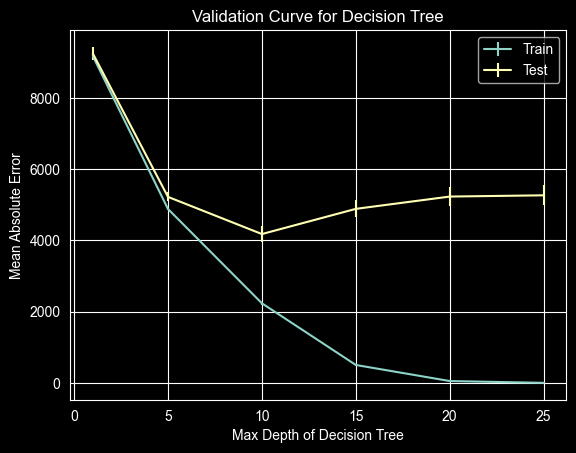

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import ValidationCurveDisplay, ShuffleSplit
from sklearn.tree import DecisionTreeRegressor
import numpy as np

housing = fetch_california_housing(as_frame=True)
data, target = housing.data, housing.target * 100

max_depth = np.array([1, 5, 10, 15, 20, 25])

disp = ValidationCurveDisplay.from_estimator(
    DecisionTreeRegressor(),
    data,
    target,
    param_name="max_depth",
    param_range=max_depth,
    cv=ShuffleSplit(n_splits=30, test_size=0.2),
    scoring="neg_mean_squared_error",
    negate_score=True,
    std_display_style="errorbar",
    n_jobs=2
)
_ = disp.ax_.set(
    xlabel="Max Depth of Decision Tree",
    ylabel="Mean Absolute Error",
    title="Validation Curve for Decision Tree"
)